# Entorno para el procesamiento de archivos de salida del modelo Fall3d

Trabajo basado en el pronóstico de caida de ceniza volcánica disponible en el página 

https://lamca.atmosfera.unam.mx/

## Creditos

- Configuración del modelo: **Dr. José Agustín García Reynoso**
- Código para generar productos: **M.C. Dulce Rosario Herrera Moro**
- Configuración y creación de entorno: **Esp. Pedro Damián Cruz Santiago**


# Ejecución
El entorno puede ser replicado en **binderhub**  o de forma local utilizando **repo2docker**.

## 1. Desempaquetar los archivos **archivos_extra.tgz**, **entradas-01.tgz** **entradas-02.tgz** y **entradas-03.tgz**

In [ ]:
%%bash 
tar xzf archivos_extra.tgz
tar xzf entradas-01.tgz
tar xzf entradas-02.tgz
tar xzf entradas-03.tgz

## 2. Abrir notebook de Paneles niveles de vuelo y Cortes 

Seleccionar el notebook **Panel_niveles_vuelo.ipynb** y **Cortes.ipynb**

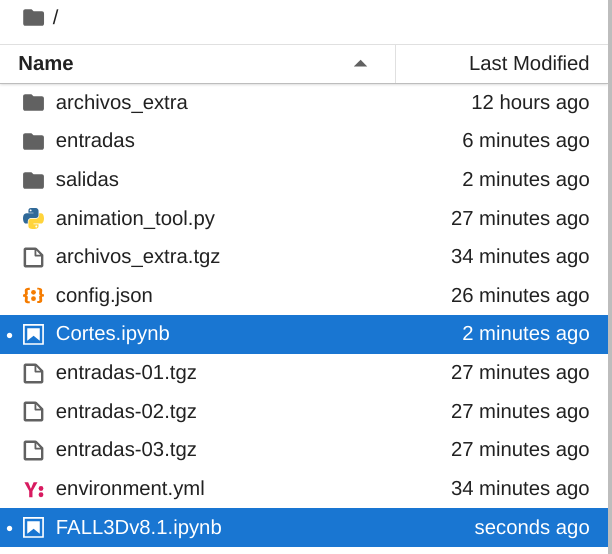

# 3.  Seleccionar Reiniciar Kernel y ejecutar todas las celdas

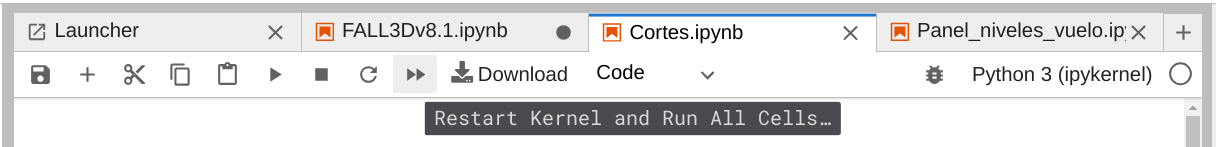